In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage.io import imread

In [32]:
n_class = 4

ima=imread('images/carte.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(init="random" ,n_clusters=n_class, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.077s.
Predicting color indices on the full image (k-means)
done in 0.003s.


C:\Users\juane\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


C:\Users\juane\AppData\Local\Temp\ipykernel_3040\263636372.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  image[i][j] = codebook[labels[label_idx]]


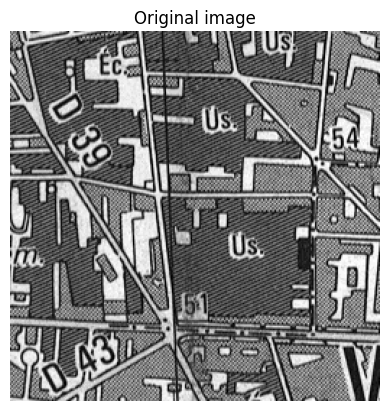

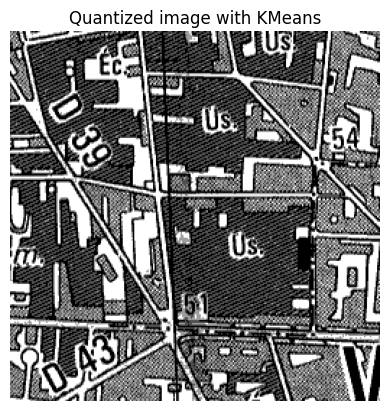

In [34]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()